In [1]:
#kütüphaneler
import pandas as pd #pandas kütüphanesi import edildi verilere erişmek için 
from sklearn import preprocessing #standartlaştırma için kullandığımız fonksiyon 
import matplotlib.pyplot as plt #çizimler için 
import numpy as np #büyük sayılar ve hesaplama için numpy kütüphanesi import edildir
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix #regrasyon için 
from sklearn.naive_bayes import BernoulliNB 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler #standartlaştırma için
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
#veri seti bir bankanın telefon ile pazarlama kamoanyaları ile ilgilidir. 
#sınıflandırma hedefi müşterinin vadeli mevduata abone olup olmayacağı ile ilgilidir(default)
bankaVeriSeti=pd.read_csv('bank.csv') #bank.csv veri seti "bankaVeriSeti" değişkenine atandı
bankaVeriSeti.head(100)

#jog=bankaVeriSeti[['job']] özelliği almka için 
#iki tane özellik çekmek içim bankaVeriSeti[['job','marital']]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,37,management,divorced,tertiary,no,122,yes,no,unknown,19,may,1622,2,-1,0,unknown,yes
96,30,technician,single,tertiary,no,880,yes,yes,unknown,19,may,967,6,-1,0,unknown,yes
97,41,technician,married,secondary,no,501,yes,no,unknown,19,may,579,5,-1,0,unknown,yes
98,36,blue-collar,married,secondary,no,4438,yes,no,unknown,20,may,446,1,-1,0,unknown,yes


In [3]:
print(bankaVeriSeti.shape)
#verisetimizde 11162 satır, 17 özellik var

print(bankaVeriSeti.columns)

(11162, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [4]:
bankaVeriSeti.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [5]:
#öncelikle veri setimizdeki string değerleri sayısal bir değer olarak ifade etmeliyiz
#bunun için Veri Biliminde Kategorik Değişkenler, Dummy (Kukla) Variable ve Python Uygulamas yapılacak

In [6]:
print(bankaVeriSeti.deposit.value_counts()) #"deposit" değerinin aldığı değerleri görelim

no     5873
yes    5289
Name: deposit, dtype: int64


In [7]:
def encode(x):
    if x == "yes":
        return 1
    elif x == "no":
        return 0
    else:
        return 2

bankaVeriSeti["deposit_encode"] = bankaVeriSeti.apply(lambda x: encode(x["deposit"]), axis = 1)

bankaVeriSeti = pd.get_dummies(bankaVeriSeti ,prefix = "deposit" 
                    ,columns = ["deposit"]
                    ,drop_first = True)

In [8]:
print(bankaVeriSeti.deposit_encode.value_counts())

0    5873
1    5289
Name: deposit_encode, dtype: int64


In [9]:
print(bankaVeriSeti.poutcome.value_counts())

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


In [10]:
def encode(x):
    if x == "unknown":
        return 0
    elif x == "failure":
        return 1
    elif x =="success":
        return 2
    else:  
        return 3

bankaVeriSeti["poutcome_encode"] = bankaVeriSeti.apply(lambda x: encode(x["poutcome"]), axis = 1)

bankaVeriSeti = pd.get_dummies(bankaVeriSeti ,prefix = "poutcome" 
                    ,columns = ["poutcome"]
                    ,drop_first = True)

In [11]:
print(bankaVeriSeti.month.value_counts())

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64


In [12]:
def encode(x):
    if x == "may":
        return 1
    elif x == "aug":
        return 2
    elif x =="jul":
        return 3
    elif x == "jun":
        return 4
    elif x =="nov":
        return 5
    elif x == "apr":
        return 6
    elif x =="feb":
        return 7
    elif x == "oct":
        return 8
    elif x =="jan":
        return 9
    elif x == "sep":
        return 10
    elif x =="mar":
        return 11
    else:  
        return 10

bankaVeriSeti["month_encode"] = bankaVeriSeti.apply(lambda x: encode(x["month"]), axis = 1)

bankaVeriSeti = pd.get_dummies(bankaVeriSeti ,prefix = "month" 
                    ,columns = ["month"]
                    ,drop_first = True)

In [13]:
print(bankaVeriSeti.contact.value_counts())

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


In [14]:
def encode(x):
    if x == "unknown":
        return 0
    elif x == "cellular":
        return 1
    elif x =="telephone":
        return 2
    else:  
        return 3

bankaVeriSeti["contact_encode"] = bankaVeriSeti.apply(lambda x: encode(x["contact"]), axis = 1)

bankaVeriSeti = pd.get_dummies(bankaVeriSeti ,prefix = "contact" 
                    ,columns = ["contact"]
                    ,drop_first = True)

In [15]:
print(bankaVeriSeti.loan.value_counts())

no     9702
yes    1460
Name: loan, dtype: int64


In [16]:
def encode(x):
    if x == "no":
        return 0
    elif x == "yes":
        return 1
    else:
        return 2

bankaVeriSeti["loan_encode"] = bankaVeriSeti.apply(lambda x: encode(x["loan"]), axis = 1)

bankaVeriSeti = pd.get_dummies(bankaVeriSeti ,prefix = "loan" 
                    ,columns = ["loan"]
                    ,drop_first = True)

In [17]:
print(bankaVeriSeti.housing.value_counts())

no     5881
yes    5281
Name: housing, dtype: int64


In [18]:
def encode(x):
    if x == "no":
        return 0
    elif x == "yes":
        return 1
    else:
        return 2

bankaVeriSeti["housing_encode"] = bankaVeriSeti.apply(lambda x: encode(x["housing"]), axis = 1)

bankaVeriSeti = pd.get_dummies(bankaVeriSeti ,prefix = "housing" 
                    ,columns = ["housing"]
                    ,drop_first = True)

In [19]:
print(bankaVeriSeti.default.value_counts())

no     10994
yes      168
Name: default, dtype: int64


In [20]:
def encode(x):
    if x == "no":
        return 0
    elif x == "yes":
        return 1
    else:
        return 2

bankaVeriSeti["default_encode"] = bankaVeriSeti.apply(lambda x: encode(x["default"]), axis = 1)

bankaVeriSeti = pd.get_dummies(bankaVeriSeti ,prefix = "default" 
                    ,columns = ["default"]
                    ,drop_first = True)

In [21]:
print(bankaVeriSeti.education.value_counts())

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


In [22]:
def encode(x):
    if x == "secondary":
        return 1
    elif x == "tertiary":
        return 2
    elif x =="primary":
        return 3
    elif x =="unknown":
        return 4
    else:  
        return 5

bankaVeriSeti["education_encode"] = bankaVeriSeti.apply(lambda x: encode(x["education"]), axis = 1)

bankaVeriSeti = pd.get_dummies(bankaVeriSeti ,prefix = "education" 
                    ,columns = ["education"]
                    ,drop_first = True)

In [23]:
print(bankaVeriSeti.marital.value_counts())

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


In [24]:
def encode(x):
    if x == "married":
        return 1
    elif x == "single":
        return 2
    elif x == "divorced":
        return 3
    else:
        return 4

bankaVeriSeti["marital_encode"] = bankaVeriSeti.apply(lambda x: encode(x["marital"]), axis = 1)

bankaVeriSeti = pd.get_dummies(bankaVeriSeti ,prefix = "marital" 
                    ,columns = ["marital"]
                    ,drop_first = True)

In [25]:
print(bankaVeriSeti.job.value_counts())

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


In [26]:
def encode(x):
    if x == "management":
        return 1
    elif x == "blue-collar":
        return 2
    elif x =="technician":
        return 3
    elif x == "admin.":
        return 4
    elif x =="services":
        return 5
    elif x == "retired":
        return 6
    elif x =="self-employed ":
        return 7
    elif x == "student":
        return 8
    elif x =="unemployed":
        return 9
    elif x == "entrepreneur":
        return 10
    elif x =="housemaid":
        return 11
    else:  
        return 10

bankaVeriSeti["job_encode"] = bankaVeriSeti.apply(lambda x: encode(x["job"]), axis = 1)

bankaVeriSeti = pd.get_dummies(bankaVeriSeti ,prefix = "job" 
                    ,columns = ["job"]
                    ,drop_first = True)

In [27]:
bankaVeriSeti.head(100)

,age,balance,day,duration,campaign,pdays,previous,deposit_encode,deposit_yes,poutcome_encode,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,59,2343,5,1042,1,-1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,56,45,5,1467,1,-1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,41,1270,5,1389,1,-1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,55,2476,5,579,1,-1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,54,184,5,673,2,-1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,37,122,19,1622,2,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
96,30,880,19,967,6,-1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
97,41,501,19,579,5,-1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
98,36,4438,20,446,1,-1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#artık tüm özelliklerimiz anlamlı değerler kazandı
#veri setini incelediğimizde duration geçen konuşma süresini göstermektedir. Doğru bir makine öğrenmesi çalışması için "duraiton" özelliği kaldırılacak

del bankaVeriSeti['duration']


In [29]:
#veri setimizi incelersek veri setimiz banka müşterilerinin özelliklerinde oluşmaktadır.

In [30]:
bankaVeriSeti.head()

,age,balance,day,campaign,pdays,previous,deposit_encode,deposit_yes,poutcome_encode,poutcome_other,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,59,2343,5,1,-1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56,45,5,1,-1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41,1270,5,1,-1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,55,2476,5,1,-1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,54,184,5,2,-1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#Veri setimşzde merak ettiğimiz konu "müşteri vadeli mevduat hesabı aldı mı?" olacaktır.
#bunun için "default" değerine bakılacak (defaul_encode)
#veri setmizi girdi ve çıktı(default(bağımlı değiken)) olarak ayıralım

In [32]:
bankaVeriSeti['default_encode'].value_counts()

0    10994
1      168
Name: default_encode, dtype: int64

In [33]:
count_no_sub = len(bankaVeriSeti[bankaVeriSeti['default_encode']==0]) 
count_sub = len(bankaVeriSeti[bankaVeriSeti['default_encode']==1]) 
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub) 
print("abonelik olmamasının yüzdesi ", pct_of_no_sub*100) 
pct_of_sub = count_sub/(count_no_sub+count_sub) 
print("abonelik yüzdesi", pct_of_sub*100)
#sonuçlara bakılınca veriler neredeyse hiç eşit dağılmamış 

abonelik olmamasının yüzdesi  98.49489338828167
abonelik yüzdesi 1.50510661171833


In [34]:
x=bankaVeriSeti.drop("default_encode", axis=1)#bağımsız değişkenler
y=bankaVeriSeti["default_encode"] #bağımlı değişkenler

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=0)

In [36]:
#LOGİSTİC REGRASYON

In [37]:
#Lojistik regrasyon

In [38]:
logr=LogisticRegression(random_state=0)
logr.fit(x_train,y_train) #x_train ve y_train  bilgileri ile fit ediyor(eğitiyor)
#predict=tahmin et
y_pred_logr=logr.predict(x_test)

D:\Users\Sema Bayrak\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
#Konfüsyon Matrisi
cm_logr=confusion_matrix(y_test,y_pred_logr)
cm_logr

array([[3633,    0],
       [   5,   46]], dtype=int64)

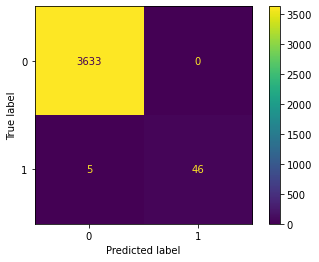

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logr, display_labels=logr.classes_)
disp.plot()

In [41]:
#accuracy
accuracy_score_logr=accuracy_score(y_test,y_pred_logr)
accuracy_score_logr

0.998642779587405

In [42]:
#precision
precision_score_logr=precision_score(y_test,y_pred_logr)
precision_score_logr

1.0

In [43]:
#recall
recall_score_logr=recall_score(y_test,y_pred_logr)
recall_score_logr

0.9019607843137255

In [44]:
#f1 skor
f1_score_logr=f1_score(y_test,y_pred_logr)
f1_score_logr

0.9484536082474228

In [45]:
#NAİVE BAYES

In [46]:
Bnb=BernoulliNB()

In [47]:
Bnb.fit(x_train,y_train)

BernoulliNB()

In [48]:
y_pred_Bnb=Bnb.predict(x_test)

In [49]:
#Konfüsyon Matrisi
cm_Bnb=confusion_matrix(y_test,y_pred_Bnb)
cm_Bnb

array([[3633,    0],
       [   3,   48]], dtype=int64)

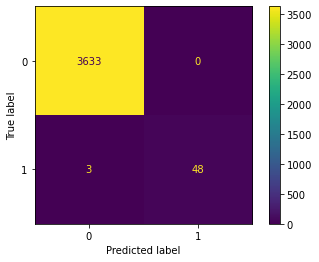

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_Bnb, display_labels=Bnb.classes_)
disp.plot()

In [51]:
#accuracy
accuracy_score_Bnb=accuracy_score(y_test,y_pred_Bnb)
accuracy_score_Bnb

0.999185667752443

In [52]:
#precision
precision_score_Bnb=precision_score(y_test,y_pred_Bnb)
precision_score_Bnb

1.0

In [53]:
#recall
recall_score_Bnb=recall_score(y_test,y_pred_Bnb)
recall_score_Bnb

0.9411764705882353

In [54]:
#f1 skor
f1_score_Bnb=f1_score(y_test,y_pred_Bnb)
f1_score_Bnb

0.9696969696969697

In [65]:
#SVM

In [66]:
svc=SVC(kernel='linear')#modelimiz doğrusal bir ayrım noktası bulmaa çalışacak
svc.fit(x_train,y_train)

y_pred_svc=svc.predict(x_test)

In [67]:
cm_svc=confusion_matrix(y_test,y_pred_svc)
cm_svc

array([[3633,    0],
       [   1,   50]], dtype=int64)

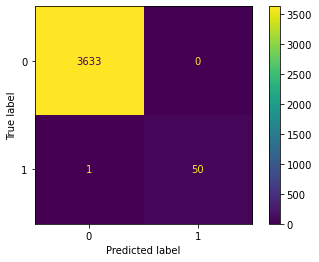

In [68]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc.classes_)
disp.plot()

In [79]:
#accuracy
accuracy_score_svc=accuracy_score(y_test,y_pred_svc)
accuracy_score_svc

0.9766558089033659

In [80]:
#precision
precision_score_svc=precision_score(y_test,y_pred_svc)
precision_score_svc

0.1276595744680851

In [81]:
#recall
recall_score_svc=recall_score(y_test,y_pred_svc)
recall_score_svc

0.11764705882352941

In [82]:
#f1 skor
f1_score_svc=f1_score(y_test,y_pred_svc)
f1_score_svc

0.12244897959183672

In [83]:
#KNN

In [84]:
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski') #komşu sayısını azaltınca doğruluk yükselir

In [85]:
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [86]:
#Konfüsyon Matrisi
cm_knn=confusion_matrix(y_test,y_pred_knn)
cm_knn

array([[3630,    3],
       [  51,    0]], dtype=int64)

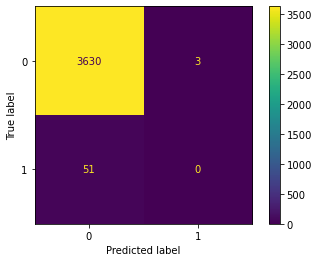

In [87]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp.plot()

In [60]:
#accuracy
accuracy_score_knn=accuracy_score(y_test,y_pred_knn)
accuracy_score_knn

0.9853420195439739

In [61]:
#precision
precision_score_knn=precision_score(y_test,y_pred_knn)
precision_score_knn

0.0

In [62]:
#recall
recall_score_knn=recall_score(y_test,y_pred_knn)
recall_score_knn

0.0

In [63]:
#f1 skor
f1_score_knn=f1_score(y_test,y_pred_knn)
f1_score_knn

0.0

In [64]:
#Neural Network